In [1]:
# Import findspark and initialize. 
import findspark
findspark.init()

In [2]:
# Import packages
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

24/11/12 19:35:17 WARN Utils: Your hostname, MacBook-Pro-14-inch-7.local resolves to a loopback address: 127.0.0.1; using 192.168.10.70 instead (on interface en0)
24/11/12 19:35:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/12 19:35:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# 1. Read in the AWS S3 bucket into a DataFrame.
from pyspark import SparkFiles
url = "https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.2/22-big-data/home_sales_revised.csv"

spark.sparkContext.addFile(url)
df = spark.read.option('header', 'true').csv(SparkFiles.get("home_sales_revised.csv"), inferSchema=True, sep=',')
df.show(5)


+--------------------+----------+----------+------+--------+---------+-----------+--------+------+----------+----+
|                  id|      date|date_built| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|
+--------------------+----------+----------+------+--------+---------+-----------+--------+------+----------+----+
|f8a53099-ba1c-47d...|2022-04-08|      2016|936923|       4|        3|       3167|   11733|     2|         1|  76|
|7530a2d8-1ae3-451...|2021-06-13|      2013|379628|       2|        2|       2235|   14384|     1|         0|  23|
|43de979c-0bf0-4c9...|2019-04-12|      2014|417866|       2|        2|       2127|   10575|     2|         0|   0|
|b672c137-b88c-48b...|2019-10-16|      2016|239895|       2|        2|       1631|   11149|     2|         0|   0|
|e0726d4d-d595-407...|2022-01-08|      2017|424418|       3|        2|       2249|   13878|     2|         0|   4|
+--------------------+----------+----------+------+--------+---------+----------

In [4]:
# 2. Create a temporary view of the DataFrame.
df.createOrReplaceTempView('home_sales')


+---------+---------+
|year_sold|avg_price|
+---------+---------+
|     2019| 300263.7|
|     2020|298353.78|
|     2021|301819.44|
|     2022|296363.88|
+---------+---------+



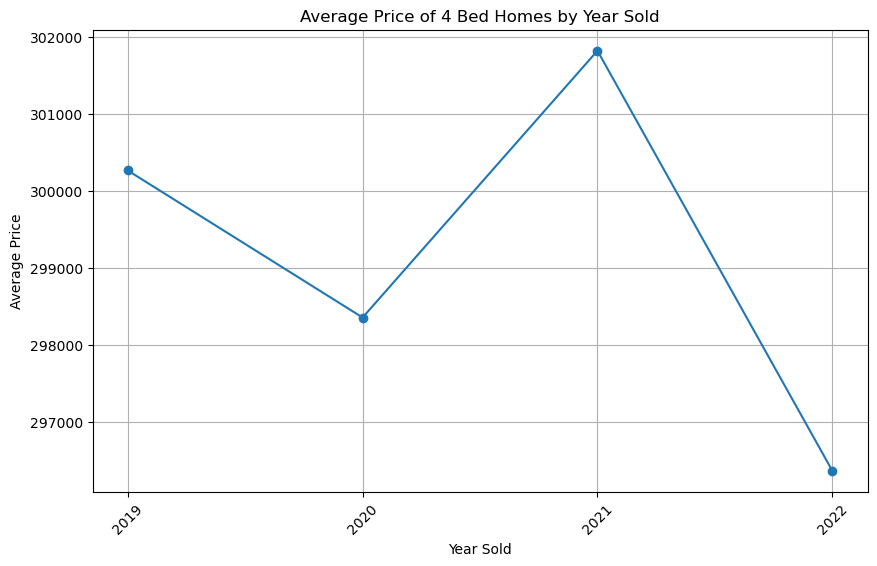

In [5]:
# 3. What is the average price for a four bedroom house sold per year, rounded to two decimal places?

result = spark.sql("""
          SELECT
            YEAR(date) AS year_sold,
            ROUND(AVG(price), 2) AS avg_price
          FROM home_sales
          WHERE bedrooms=4
          GROUP BY year_sold
          ORDER BY year_sold""")

# Show table
result.show()

# Convert to Pandas DataFrame for plotting
pdf = result.toPandas()

# plot
plt.figure(figsize=(10, 6))
plt.plot(pdf['year_sold'], pdf['avg_price'], marker='o', linestyle='-')
plt.title("Average Price of 4 Bed Homes by Year Sold")
plt.xlabel("Year Sold")
plt.ylabel("Average Price")
plt.xticks(range(int(pdf['year_sold'].min()), int(pdf['year_sold'].max()) + 1), rotation=45)
plt.grid(True)
plt.show()


+----------+---------+
|year_built|avg_price|
+----------+---------+
|      2010|292859.62|
|      2011|291117.47|
|      2012|293683.19|
|      2013|295962.27|
|      2014|290852.27|
|      2015| 288770.3|
|      2016|290555.07|
|      2017|292676.79|
+----------+---------+



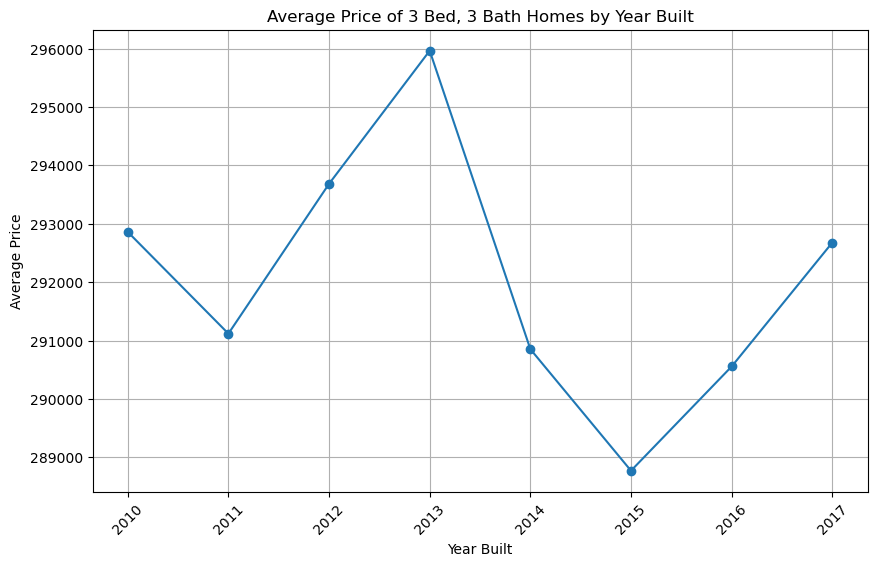

In [6]:
# 4. What is the average price of a home for each year the home was built,
# that have 3 bedrooms and 3 bathrooms, rounded to two decimal places?
result2 = spark.sql("""
          SELECT
            date_built as year_built,
            ROUND(AVG(price), 2) AS avg_price
          FROM home_sales
          WHERE bedrooms=3 AND bathrooms=3
          GROUP BY year_built
          ORDER BY year_built""")

# Show table
result2.show()

# Convert to Pandas DataFrame for plotting
pdf = result2.toPandas()

# plot
plt.figure(figsize=(10, 6))
plt.plot(pdf['year_built'], pdf['avg_price'], marker='o', linestyle='-')
plt.title("Average Price of 3 Bed, 3 Bath Homes by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


+----------+---------+
|year_built|avg_price|
+----------+---------+
|      2010|285010.22|
|      2011|276553.81|
|      2012|307539.97|
|      2013|303676.79|
|      2014|298264.72|
|      2015|297609.97|
|      2016| 293965.1|
|      2017|280317.58|
+----------+---------+



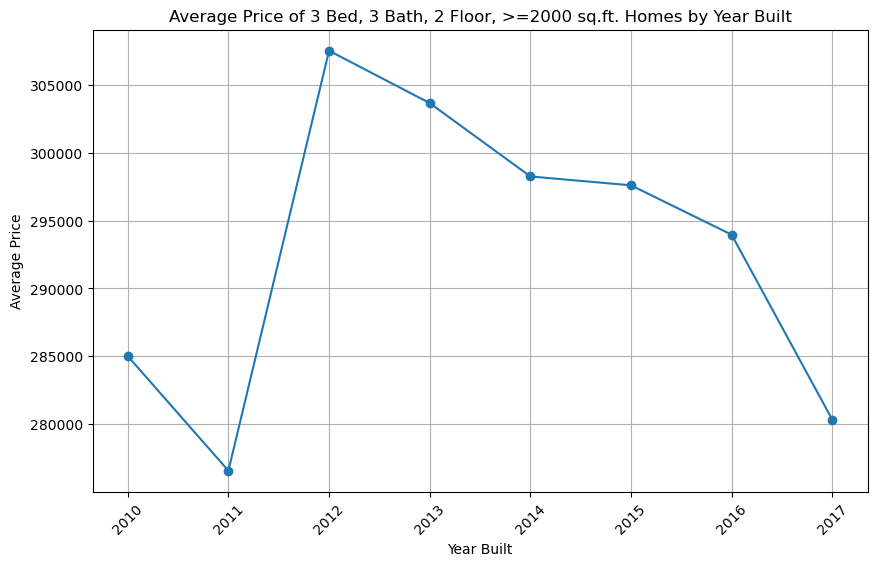

In [7]:
# 5. What is the average price of a home for each year the home was built,
# that have 3 bedrooms, 3 bathrooms, with two floors,
# and are greater than or equal to 2,000 square feet, rounded to two decimal places?

result3 = spark.sql("""
          SELECT
            date_built as year_built,
            ROUND(AVG(price), 2) AS avg_price
          FROM home_sales
          WHERE
            bedrooms=3
            AND bathrooms=3
            AND floors=2
            AND sqft_living>=2000
          GROUP BY year_built
          ORDER BY year_built""")

# Show table
result3.show()

# Convert to Pandas DataFrame for plotting
pdf = result3.toPandas()

# plot
plt.figure(figsize=(10, 6))
plt.plot(pdf['year_built'], pdf['avg_price'], marker='o', linestyle='-')
plt.title("Average Price of 3 Bed, 3 Bath, 2 Floor, >=2000 sq.ft. Homes by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


+----+----------+
|view| avg_price|
+----+----------+
| 100| 1026669.5|
|  99|1061201.42|
|  98|1053739.33|
|  97|1129040.15|
|  96|1017815.92|
|  95| 1054325.6|
|  94| 1033536.2|
|  93|1026006.06|
|  92| 970402.55|
|  91|1137372.73|
|  90|1062654.16|
|  89|1107839.15|
|  88|1031719.35|
|  87| 1072285.2|
|  86|1070444.25|
|  85|1056336.74|
|  84|1117233.13|
|  83|1033965.93|
|  82| 1063498.0|
|  81|1053472.79|
+----+----------+
only showing top 20 rows



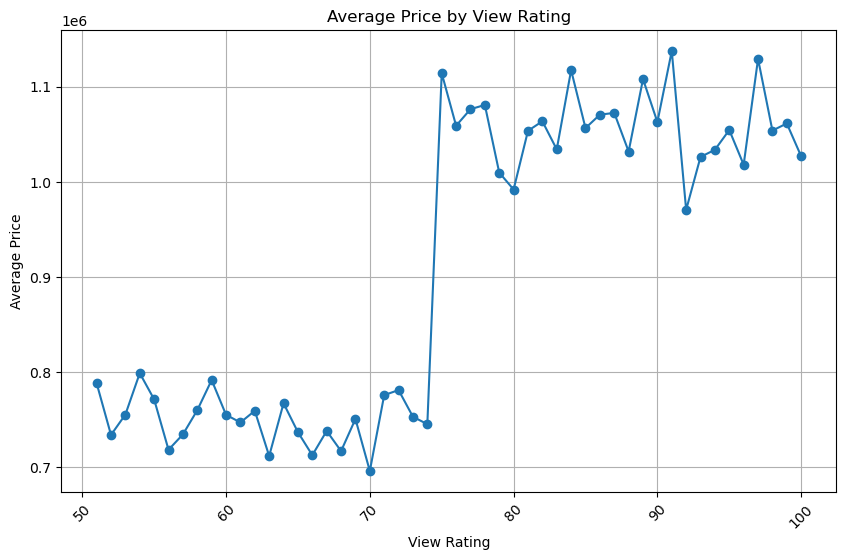

--- 1.269407033920288 seconds ---


In [8]:
# 6. What is the average price of a home per "view" rating, rounded to two decimal places,
# having an average home price greater than or equal to $350,000? Order by descending view rating. 
# Although this is a small dataset, determine the run time for this query.

start_time = time.time()

# This query will be used multiple times, save it to a variable
QUERY_VIEW_RATING = """
                    SELECT
                        view,
                        ROUND(AVG(price), 2) AS avg_price
                    FROM home_sales
                    GROUP BY view
                    HAVING avg_price >= 350000
                    ORDER BY view DESC
                    """
result4 = spark.sql(QUERY_VIEW_RATING)

# Show table
result4.show()

# Convert to Pandas DataFrame for plotting
pdf = result4.toPandas()

# plot
plt.figure(figsize=(10, 6))
plt.plot(pdf['view'], pdf['avg_price'], marker='o', linestyle='-')
plt.title("Average Price by View Rating")
plt.xlabel("View Rating")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#row_count = result4.count()
#print(f"Number of rows: {row_count}")

print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
# 7. Cache the the temporary table home_sales.
spark.sql("cache table home_sales")

DataFrame[]

In [10]:
# 8. Check if the table is cached.
spark.catalog.isCached('home_sales')

True

In [11]:
# 9. Using the cached data, run the last query above, that calculates 
# the average price of a home per "view" rating, rounded to two decimal places,
# having an average home price greater than or equal to $350,000. 
# Determine the runtime and compare it to the uncached runtime.

start_time = time.time()

spark.sql(QUERY_VIEW_RATING).show()

print("--- %s seconds ---" % (time.time() - start_time))


+----+----------+
|view| avg_price|
+----+----------+
| 100| 1026669.5|
|  99|1061201.42|
|  98|1053739.33|
|  97|1129040.15|
|  96|1017815.92|
|  95| 1054325.6|
|  94| 1033536.2|
|  93|1026006.06|
|  92| 970402.55|
|  91|1137372.73|
|  90|1062654.16|
|  89|1107839.15|
|  88|1031719.35|
|  87| 1072285.2|
|  86|1070444.25|
|  85|1056336.74|
|  84|1117233.13|
|  83|1033965.93|
|  82| 1063498.0|
|  81|1053472.79|
+----+----------+
only showing top 20 rows

--- 0.28186511993408203 seconds ---


In [12]:
# 10. Partition by the "date_built" field on the formatted parquet home sales data 
df.write.partitionBy("date_built").parquet("date_built_partitioned", mode="overwrite")

In [13]:
# 11. Read the formatted parquet data.
p_df = spark.read.parquet('date_built_partitioned')

In [14]:
# 12. Create a temporary table for the parquet data.
p_df.createOrReplaceTempView('home_sales_partitioned')

In [15]:
# 13. Using the parquet DataFrame, run the last query above, that calculates 
# the average price of a home per "view" rating, rounded to two decimal places,
# having an average home price greater than or equal to $350,000. 
# Determine the runtime and compare it to the cached runtime.

start_time = time.time()

# make sure to update the `FROM` to the new temp view table
QUERY_VIEW_RATING_PARTITION = """
                              SELECT
                                  view,
                                  ROUND(AVG(price), 2) AS avg_price
                              FROM home_sales_partitioned
                              GROUP BY view
                              HAVING avg_price >= 350000
                              ORDER BY view DESC
                              """
spark.sql(QUERY_VIEW_RATING_PARTITION).show()

print("--- %s seconds ---" % (time.time() - start_time))

+----+----------+
|view| avg_price|
+----+----------+
| 100| 1026669.5|
|  99|1061201.42|
|  98|1053739.33|
|  97|1129040.15|
|  96|1017815.92|
|  95| 1054325.6|
|  94| 1033536.2|
|  93|1026006.06|
|  92| 970402.55|
|  91|1137372.73|
|  90|1062654.16|
|  89|1107839.15|
|  88|1031719.35|
|  87| 1072285.2|
|  86|1070444.25|
|  85|1056336.74|
|  84|1117233.13|
|  83|1033965.93|
|  82| 1063498.0|
|  81|1053472.79|
+----+----------+
only showing top 20 rows

--- 1.091722011566162 seconds ---


In [16]:
# 14. Uncache the home_sales temporary table.
spark.sql("uncache table home_sales")

DataFrame[]

In [17]:
# 15. Check if the home_sales is no longer cached
spark.catalog.isCached("home_sales")

False

In [18]:
spark.stop()